## Testing Query Functions

In [ ]:
# This code can be inserted into ssobject_plots if you want to see how many discoveries were after a certain date 
mask = df['discoverySubmissionDate'].notna()
mjd_values = df.loc[mask, 'discoverySubmissionDate'].astype(float)
converted_times = Time(mjd_values, format='mjd').to_datetime()
df['discoverySubmissionDate'] = df['discoverySubmissionDate'].astype('object')
df.loc[mask, 'discoverySubmissionDate'] = pd.Series(converted_times, index=mjd_values.index)
df['discoverySubmissionDate'] = pd.to_datetime(df['discoverySubmissionDate'], errors='coerce')
discovery_cutoff = pd.Timestamp(discovery_cutoff)
df['is_new'] = df['discoverySubmissionDate'] >= discovery_cutoff

In [1]:
from query import make_query, run_query
from plots import run_basic_plots, run_ssobject_plots
import pandas as pd
import matplotlib.pyplot as plt

### Test 1: Near Earth Obejcts (NEOs)

#### Query DP03 catalog for MPCORB joined with SSObject for NEOs based on their dynamical constraints.

In [2]:
dp03_neos_sso, neos = make_query('dp03_catalogs_10yr', 'NEO', join='SSObject')
print(f"\nQuery:\n{dp03_neos_sso}")

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


In [3]:
dp03_neos_sso_df = run_query(dp03_neos_sso, neos, catalog = "dp03_catalogs_10yr", to_pandas = True)

Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60747.0,0.396081,13.476295,0.669659,12.608139,8.45061,1929 SH,59,1.123543,12.806637,0.198498,3351269693330531197,1.860420,NEO
1,60219.0,0.435987,18.141359,0.641882,17.297379,11.88325,1932 EA1,282,1.080947,17.499477,0.202099,-5234750409166262016,1.916528,NEO
2,60422.0,0.763999,19.550732,0.634323,18.710812,1.32170,1936 CA,254,0.441069,18.916409,0.205597,7991128850154218427,1.868924,NEO
3,60560.0,0.623179,18.261578,0.624949,17.455847,6.06758,1937 UB,156,0.622294,17.636629,0.180782,-7789613295760699323,1.651432,NEO
4,60224.0,0.712520,16.118109,0.659043,15.249735,2.52162,1947 XC,321,0.625595,15.459065,0.209331,8551587316774204226,2.176135,NEO
5,60236.0,0.436676,15.087029,0.661860,14.244156,9.38260,1948 OA,306,0.769900,14.425168,0.181012,-2686348740622689257,1.366710,NEO
6,62611.0,0.826915,17.456528,0.659622,16.667896,22.79956,1949 MA,240,0.186402,16.796906,0.129009,-4973461691235584486,1.076942,NEO
7,63488.0,0.506705,18.075974,0.659075,17.227503,12.17004,1950 DA,86,0.834799,17.416899,0.189396,-380759069841638484,1.692293,NEO
8,60276.0,0.487689,15.452276,0.647643,14.605020,52.09591,1950 KA,474,1.125272,14.804633,0.199614,-1854470688567756410,2.196461,NEO
9,61740.0,0.365596,14.528775,0.641419,13.706590,26.86821,1950 LA,193,1.083856,13.887356,0.180766,7033084508252373249,1.708465,NEO


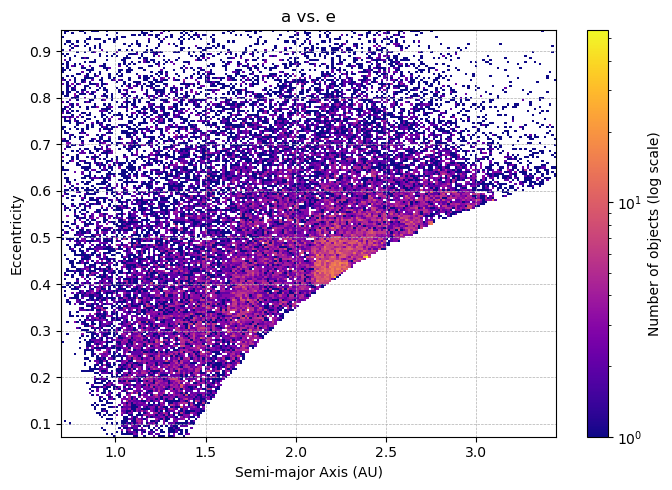

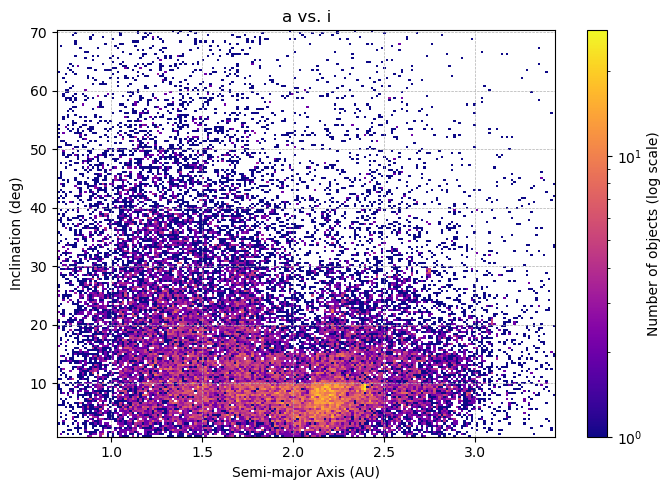

In [4]:
run_basic_plots(dp03_neos_sso_df, log_scale=True) #Logscale helps bring out density on heatmap 

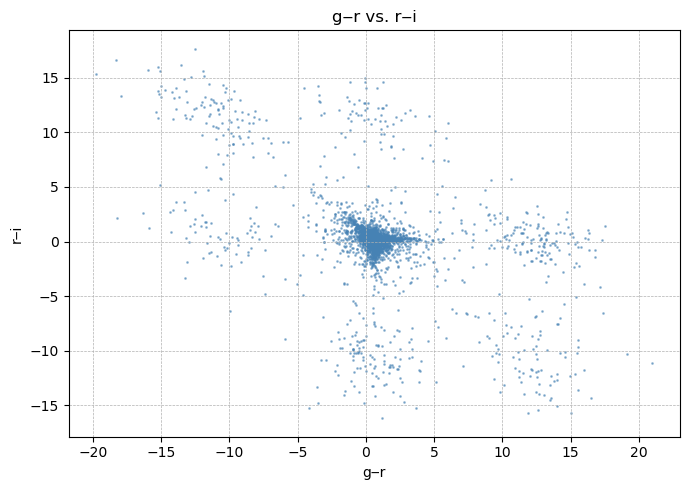

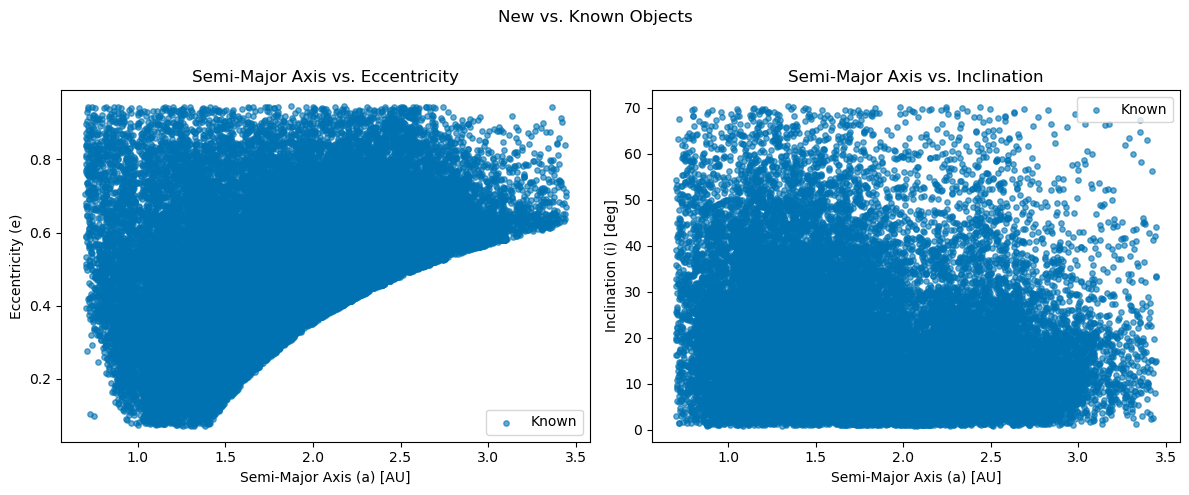

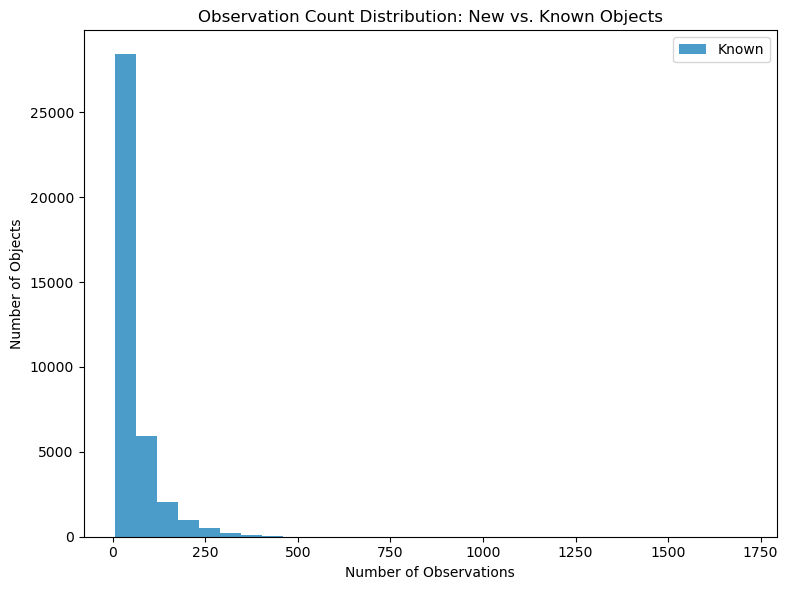

In [5]:
run_ssobject_plots(dp03_neos_sso_df, discovery_cutoff = "2025-06-30")

#### Query DP1 catalog for MPCORB joined with SSObject for NEOs based on their dynamical constraints.

In [6]:
dp1_neos_sso, neos = make_query('dp1', 'NEO', join='SSObject')
print(f"\nQuery:\n{dp1_neos_sso}")

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


In [7]:
dp1_neos_sso_df = run_query(dp1_neos_sso, neos, catalog = "dp1", to_pandas = True)

Job phase is COMPLETED


,discoverySubmissionDate,e,incl,mpcDesignation,numObs,q,ssObjectID,a,class_name
0,NaN,0.544695,33.705677,2002 FB6,16,0.818067,21163615737361986,1.796745,NEO
1,NaN,0.383285,38.956723,2009 VA26,1,0.933121,21163646070699585,1.513052,NEO
2,NaN,0.173054,18.283831,2023 UN9,6,0.808130,21165819307243854,0.977247,NEO


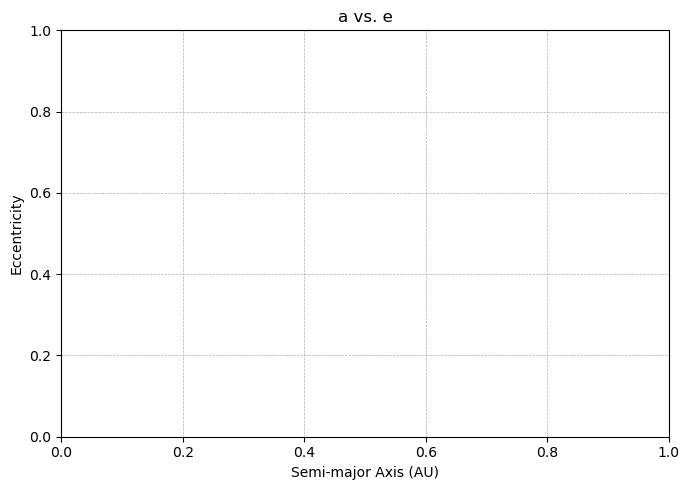

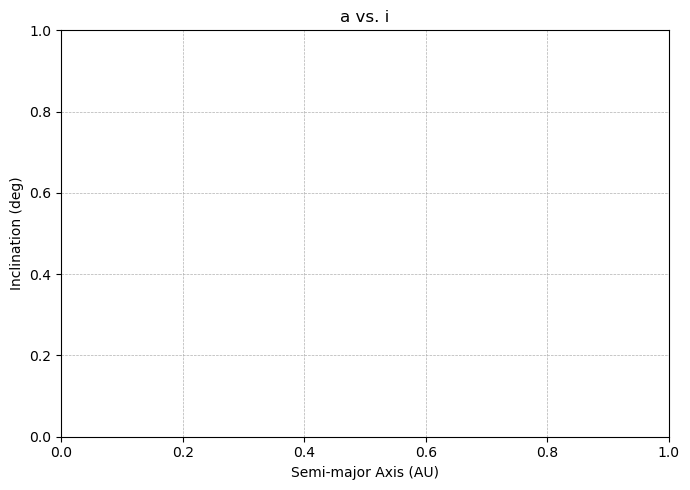

In [8]:
run_basic_plots(dp1_neos_sso_df)

/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


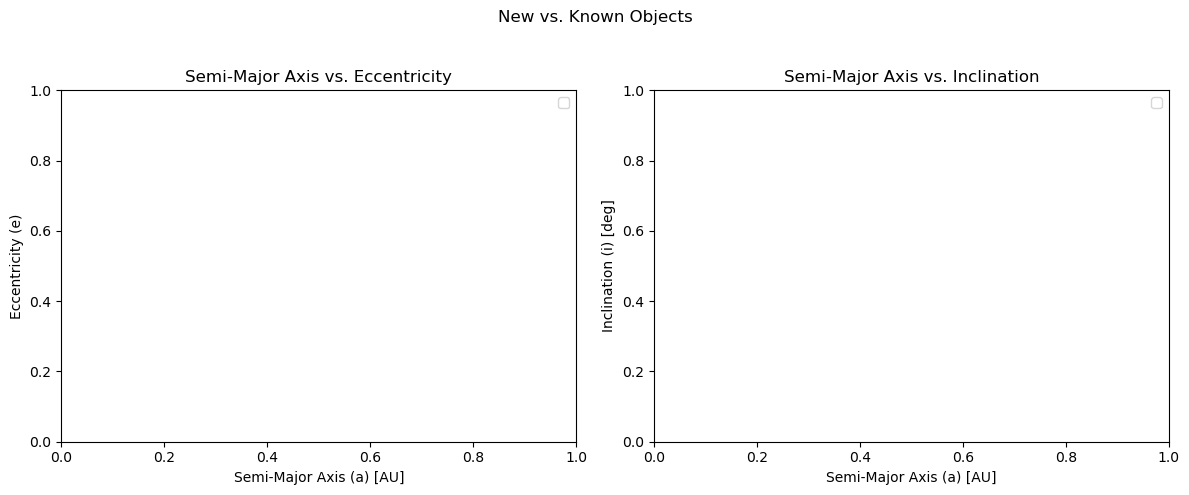

/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


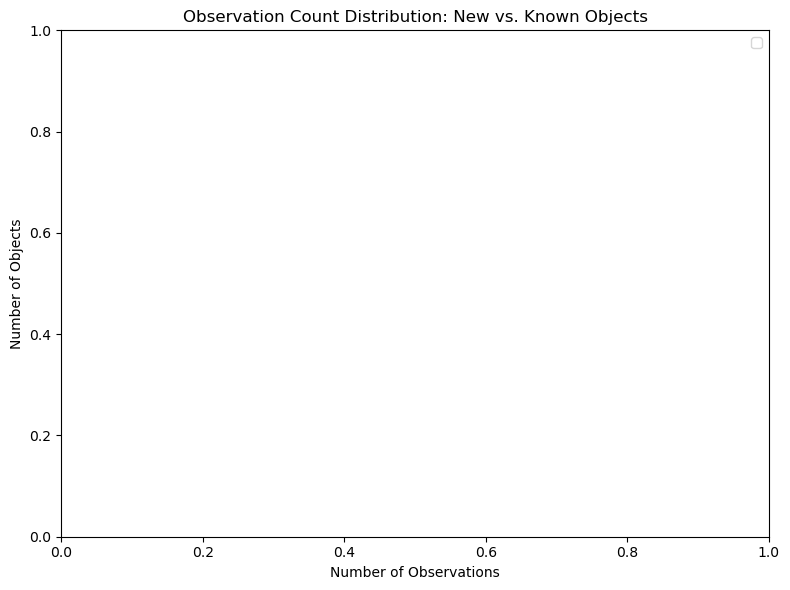

In [9]:
run_ssobject_plots(dp1_neos_sso_df, discovery_cutoff = "2025-06-30")

#### Query DP1 catalog for MPCORB joined with DiaSource for NEOs based on their dynamical constraints.

In [10]:
dp1_neos_dia, neos = make_query('dp1', 'NEO', join='DiaSource')
print(f"\nQuery:\n{dp1_neos_dia}")

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


In [11]:
dp1_neos_dia_df = run_query(dp1_neos_dia, neos, catalog = "dp1", to_pandas = True)

Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,137561.000000,464.989014,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
1,143463.000000,498.498993,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
2,240864.000000,609.564026,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
3,217844.000000,670.518005,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
4,278750.000000,923.974976,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
5,272183.000000,862.742981,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
6,6255.779785,686.778015,False,i,0.383285,38.956723,2009 VA26,0.933121,21163646070699585,1.513052,NEO
7,3186.149902,357.355011,False,r,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
8,2229.699951,261.351013,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
9,1997.040039,262.979004,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO


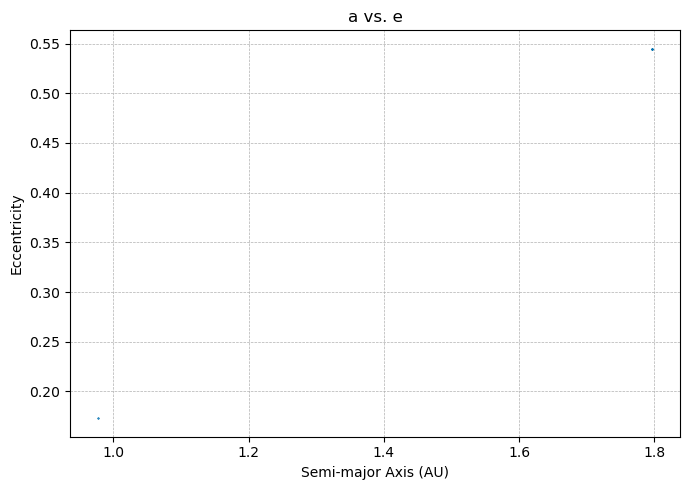

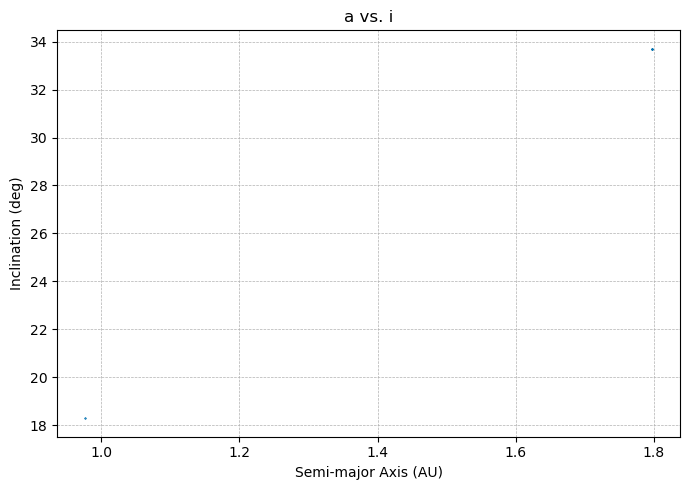

In [12]:
run_basic_plots(dp1_neos_dia_df)

### Test 2: Main Belt Asteroids (MBAs)

#### Query DP03 catalog for MPCORB joined with SSObject for MBAs based on their dynamical constraints.

In [13]:
dp03_mbas_sso, mbas = make_query('dp03_catalogs_10yr', 'MBA', join='SSObject')
print(f"\nQuery:\n{dp03_mbas_sso}")

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q > 1.66 AND mpc.q/(1-mpc.e) > 2.0 AND mpc.q/(1-mpc.e) < 3.2;


In [14]:
dp03_mbas_sso_df = run_query(dp03_mbas_sso, mbas, catalog = "dp03_catalogs_10yr", to_pandas = True)

Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60218.00000,0.103647,14.344671,0.647979,13.497434,2.25617,1001 T-2,325,2.634824,13.696692,0.199259,-8913159981519932845,2.939494,MBA
1,61279.00000,0.109610,16.776653,0.642136,15.933756,1.55987,1002 T-2,234,2.063750,16.134518,0.200762,6203778644188667635,2.317805,MBA
2,60303.00000,0.145710,14.836158,0.648691,13.998438,0.72745,1003 T-2,194,2.647201,14.187467,0.189029,-3002051867512054290,3.098714,MBA
3,61227.00000,0.045188,16.049704,0.649971,15.204431,6.90619,1004 T-2,225,2.456224,15.399733,0.195302,2844359012889597252,2.572468,MBA
4,61456.00000,0.226934,15.412127,0.476530,14.817120,8.37026,1004 T-3,218,2.312656,14.935596,0.118477,-8365056588950409896,2.991539,MBA
5,60367.00000,0.093481,14.693428,0.645403,13.846364,2.19776,1005 T-2,297,2.744248,14.048025,0.201661,7666959711836374386,3.027236,MBA
6,60573.00000,0.103091,16.315449,0.630301,15.484379,3.21753,1007 T-2,311,2.230457,15.685147,0.200768,-8774634010860397048,2.486825,MBA
7,60722.00000,0.124349,15.154297,0.470178,14.563657,11.20681,1008 T-2,318,2.705373,14.684119,0.120462,5461598545076154580,3.089558,MBA
8,60357.00000,0.169675,15.556782,0.473254,14.968402,12.60331,1008 T-3,272,2.583590,15.083528,0.115126,-2544184770395092401,3.111542,MBA
9,60417.00000,0.090426,13.120178,0.476873,12.524310,9.51442,1010 T-2,354,2.730886,12.643305,0.118995,9003861833560702799,3.002378,MBA


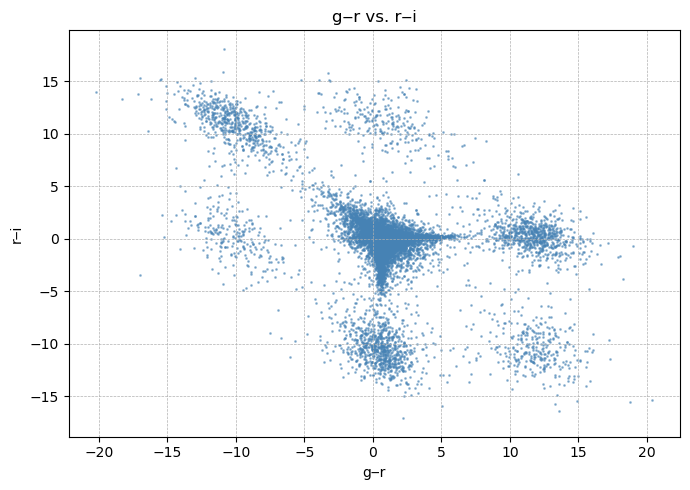

/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:115: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


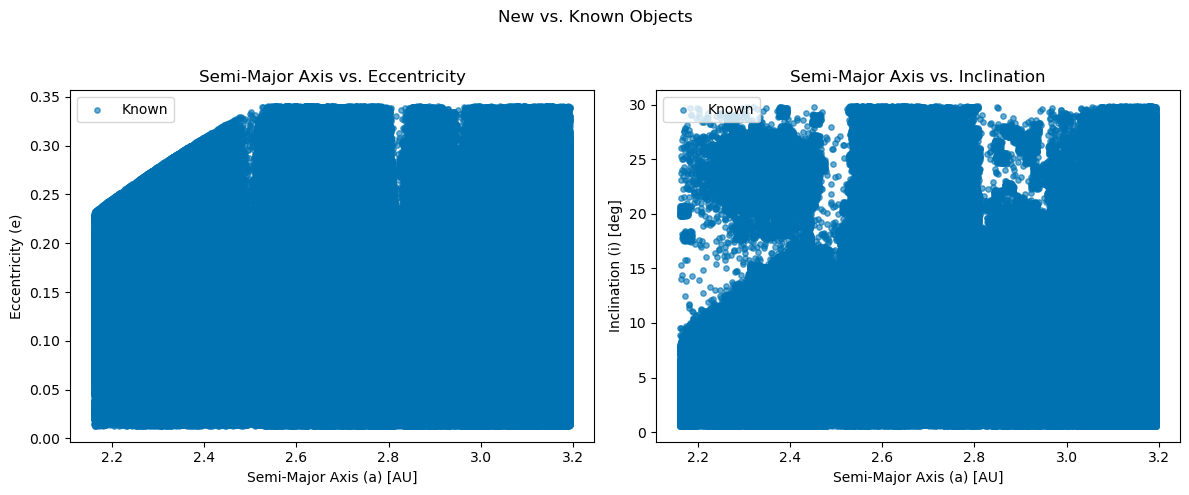

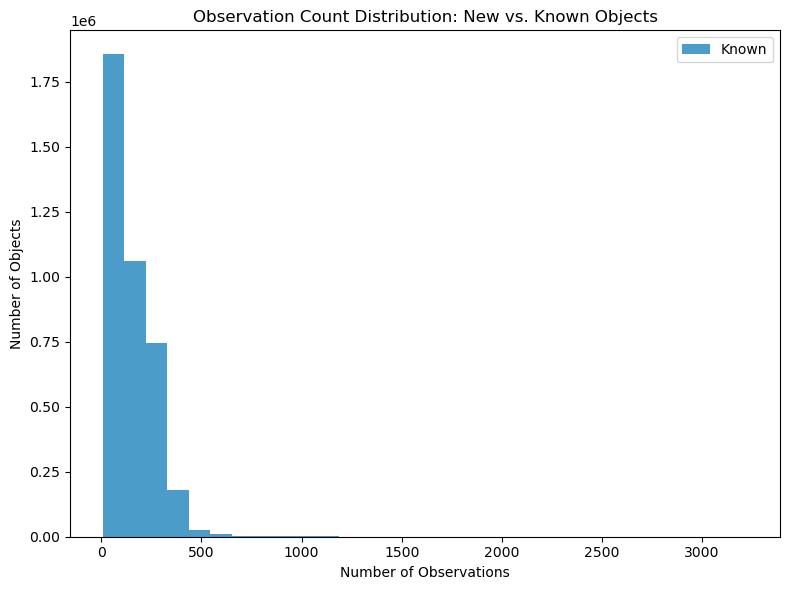

In [15]:
run_ssobject_plots(dp03_mbas_sso_df, discovery_cutoff = "2025-06-30")

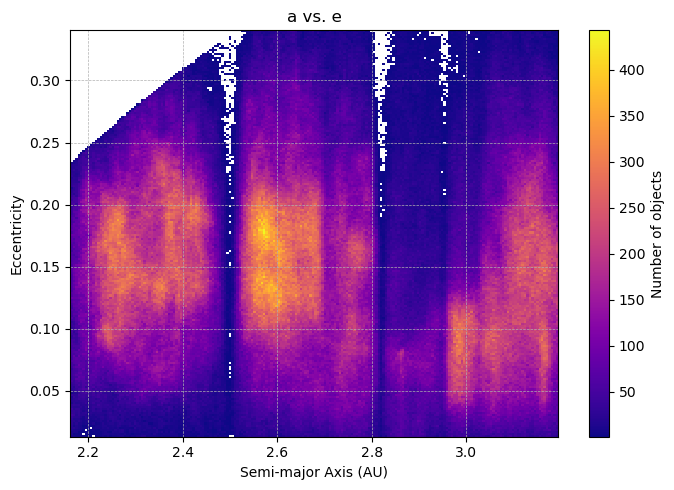

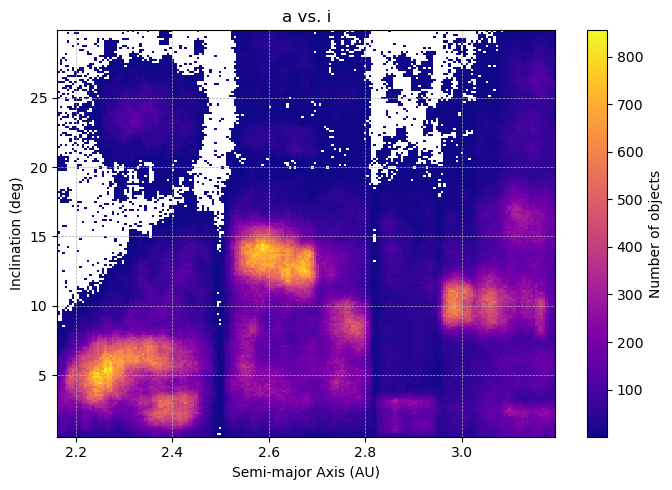

In [16]:
run_basic_plots(dp03_mbas_sso_df)

#### Query DP1 catalog for MPCORB joined with SSObject for MBAs based on their dynamical constraints.

In [7]:
dp1_mbas_sso, mbas = make_query('dp1', 'MBA', join='SSObject')
print(f"\nQuery:\n{dp1_mbas_sso}")

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q > 1.66 AND mpc.q/(1-mpc.e) > 2.0 AND mpc.q/(1-mpc.e) < 3.2;


In [8]:
dp1_mbas_sso_df = run_query(dp1_mbas_sso, mbas, catalog = "dp1", to_pandas = True)

Job phase is COMPLETED


,discoverySubmissionDate,e,incl,mpcDesignation,numObs,q,ssObjectID,a,class_name
0,NaN,0.085083,6.172520,1981 EJ47,3,2.214434,20890932542191434,2.420366,MBA
1,NaN,0.123997,4.667199,1984 SO5,8,2.352472,20890945661711695,2.685462,MBA
2,NaN,0.156926,5.621222,1985 VD,6,2.652810,20890950007009348,3.146592,MBA
3,NaN,0.101921,4.840250,1985 VE,19,2.089647,20890950007009349,2.326797,MBA
4,NaN,0.115775,5.202303,1991 SJ,11,1.942957,20892032288436298,2.197356,MBA
5,NaN,0.233890,8.410585,1991 XC1,20,2.394301,20892032372322627,3.125272,MBA
6,NaN,0.131549,8.324338,1992 WM5,8,2.196971,20892036650513741,2.529758,MBA
7,NaN,0.259531,4.465311,1993 TR37,5,1.687654,20892040895346514,2.279169,MBA
8,NaN,0.036856,5.229717,1995 SP71,21,2.470180,20892049468764496,2.564704,MBA
9,NaN,0.063483,7.950412,1996 SH6,5,2.151422,20892053763274312,2.297258,MBA


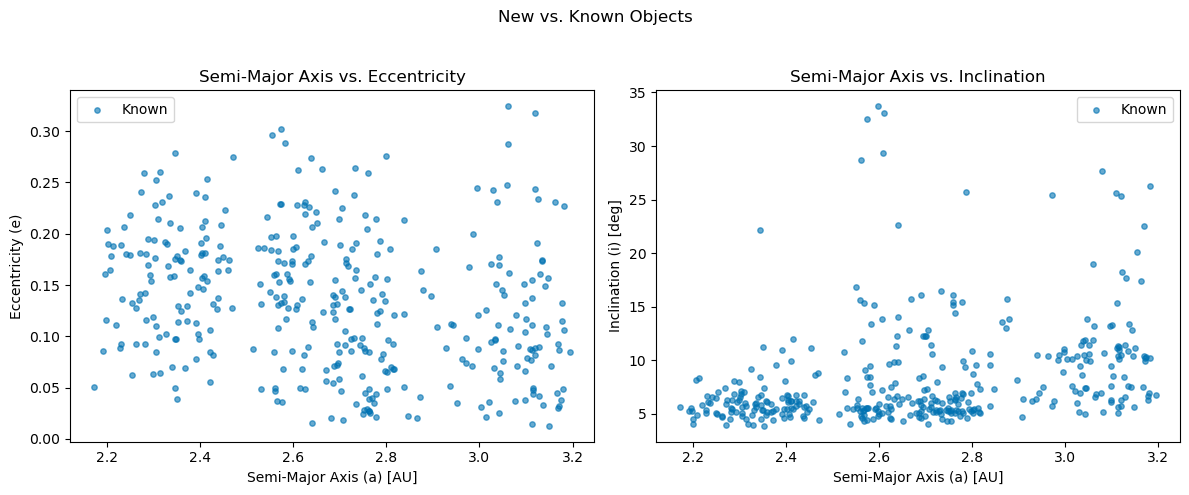

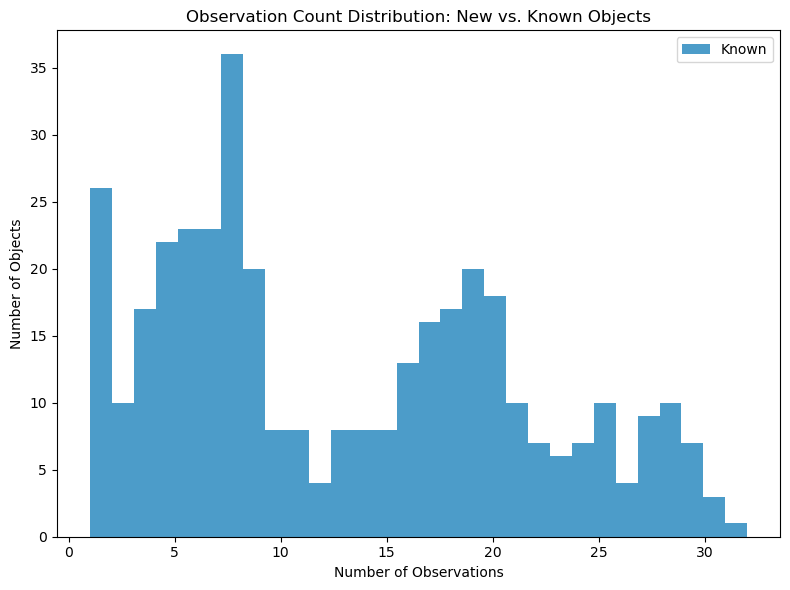

In [9]:
run_ssobject_plots(dp1_mbas_sso_df, discovery_cutoff = "2025-06-30")

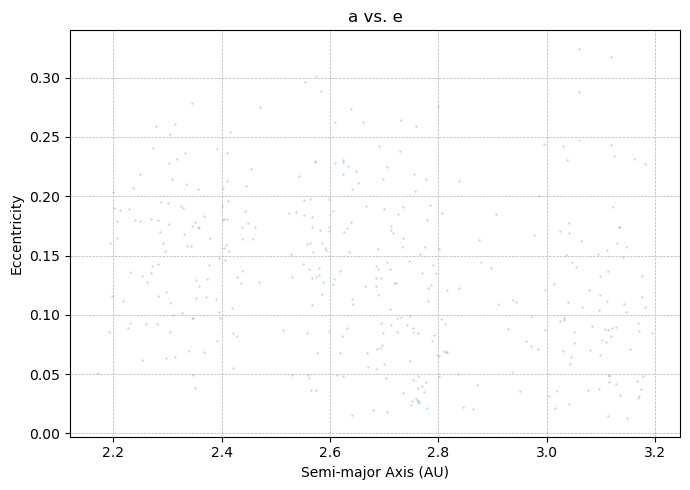

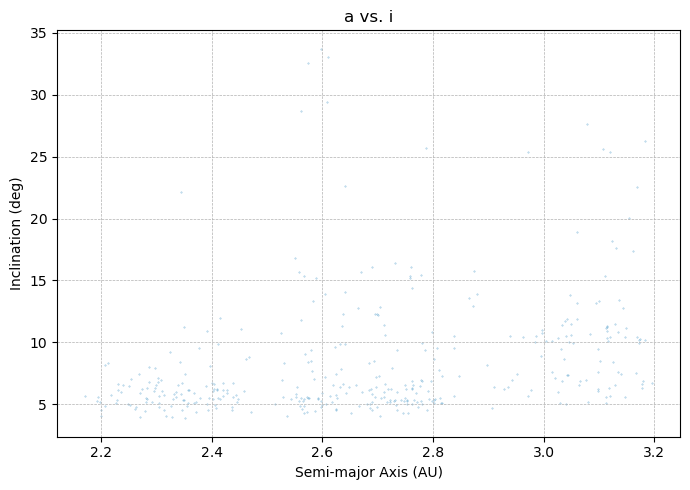

In [11]:
run_basic_plots(dp1_mbas_sso_df)

### Test 3: Trans-Neptunian Objects (TNOs)

#### Query DP1 catalog for MPCORB joined with SSObject for TNOs based on their dynamical constraints.

In [12]:
dp1_tnos_sso, tnos = make_query('dp1', 'TNO', join='SSObject')
print(f"\nQuery:\n{dp1_tnos_sso}")

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 30.1 AND mpc.q/(1-mpc.e) < 50.0;


In [13]:
dp1_tnos_sso_df = run_query(dp1_tnos_sso, tnos, catalog = "dp1", to_pandas = True)

Job phase is COMPLETED


ValueError: Result table is empty or None. Check input cutoffs.

In [ ]:
run_basic_plots(dp1_tnos_sso_df)

In [ ]:
run_ssobject_plots(dp1_tnos_sso_df, discovery_cutoff = "2025-06-30")

### Test 4: Jupiter Family Comets (JFCs)

#### Query DP03 catalog for MPCORB joined with SSObject for JFCs based on their dynamical constraints.

In [ ]:
dp03_jfcs_sso, jfcs = make_query('dp03_catalogs_10yr', 'JFC', join='SSObject')
print(f"\nQuery:\n{dp03_jfcs_sso}")

In [ ]:
dp03_jfcs_sso_df = run_query(dp03_jfcs_sso, jfcs, catalog = "dp03_catalogs_10yr", to_pandas = True)

In [ ]:
run_basic_plots(dp03_jfcs_sso_df)

In [ ]:
run_ssobject_plots(dp03_jfcs_sso_df, discovery_cutoff = "2025-06-30")

#### Query DP1 catalog for MPCORB joined with SSObject for JFCs based on their dynamical constraints.

In [ ]:
dp1_jfcs_sso, jfcs = make_query('dp03_catalogs_10yr', 'JFC', join='SSObject')
print(f"\nQuery:\n{dp1_jfcs_sso}")

In [ ]:
dp1_jfcs_sso_df = run_query(dp1_jfcs_sso, jfcs, catalog = "dp1", to_pandas = True)

In [ ]:
run_basic_plots(dp1_jfcs_sso_df)

In [ ]:
run_ssobject_plots(dp1_jfcs_sso_df, discovery_cutoff = "2025-06-30")

### Testing number of objects in different tables

In [10]:
# Just get count of NEOs in dp1.MPCORB
from lsst.rsp import get_tap_service

service = get_tap_service("tap")  # dp1 uses 'tap'

# This reproduces the NEO orbital definition
neo_query = """
SELECT COUNT(*) 
FROM dp1.MPCORB AS mpc
WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1 - mpc.e) < 4.0
"""

job = service.submit_job(neo_query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()

result = job.fetch_result().to_table()
print(f"Number of NEOs in DP1: {result[0][0]}")


Job phase is COMPLETED
Number of NEOs in DP1: 33892


In [12]:
# Now get count of NEOs in dp1.MPCORB joined with SSObject
from lsst.rsp import get_tap_service

service = get_tap_service("tap")  # dp1 uses 'tap'

# Inner join with SSObject, apply NEO orbital constraints
neo_join_query = """
SELECT COUNT(*) 
FROM dp1.MPCORB AS mpc
INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1 - mpc.e) < 4.0
"""

job = service.submit_job(neo_join_query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()

result = job.fetch_result().to_table()
print(f"Number of NEOs in DP1 with SSObject: {result[0][0]}")


Job phase is COMPLETED
Number of NEOs in DP1 with SSObject: 3


In [13]:
from lsst.rsp import get_tap_service

service = get_tap_service("tap")  # dp1 uses 'tap'

# MBA orbital cutoffs:
# "MBA": {"q_min": 1.66, "a_min": 2.0, "a_max": 3.2}
# Recall: a = q / (1 - e)

mba_join_query = """
SELECT COUNT(*) 
FROM dp1.MPCORB AS mpc
INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
WHERE mpc.q > 1.66 AND mpc.q/(1 - mpc.e) > 2.0 AND mpc.q/(1 - mpc.e) < 3.2
"""

job = service.submit_job(mba_join_query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()

result = job.fetch_result().to_table()
print(f"Number of MBAs in DP1 with SSObject: {result[0][0]}")

Job phase is COMPLETED
Number of MBAs in DP1 with SSObject: 391


In [14]:
from lsst.rsp import get_tap_service

service = get_tap_service("tap")  # dp1 uses 'tap'

# TNO orbital cutoffs:
# "TNO": {"a_min": 30.1, "a_max": 50.0}
# Recall: a = q / (1 - e)

mba_join_query = """
SELECT COUNT(*)
FROM dp1.MPCORB AS mpc
INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
WHERE mpc.q/(1-mpc.e) > 30.1 AND mpc.q/(1-mpc.e) < 50.0;
"""

job = service.submit_job(mba_join_query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()

result = job.fetch_result().to_table()
print(f"Number of TNOs in DP1 with SSObject: {result[0][0]}")

Job phase is COMPLETED
Number of TNOs in DP1 with SSObject: 0


### Testing Plots

In [5]:
df = run_query(dp03_neos_sso, 'NEO', 'dp03_catalogs_10yr', to_pandas = True)

Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60747.0,0.396081,13.476295,0.669659,12.608139,8.45061,1929 SH,59,1.123543,12.806637,0.198498,3351269693330531197,1.860420,NEO
1,60219.0,0.435987,18.141359,0.641882,17.297379,11.88325,1932 EA1,282,1.080947,17.499477,0.202099,-5234750409166262016,1.916528,NEO
2,60422.0,0.763999,19.550732,0.634323,18.710812,1.32170,1936 CA,254,0.441069,18.916409,0.205597,7991128850154218427,1.868924,NEO
3,60560.0,0.623179,18.261578,0.624949,17.455847,6.06758,1937 UB,156,0.622294,17.636629,0.180782,-7789613295760699323,1.651432,NEO
4,60224.0,0.712520,16.118109,0.659043,15.249735,2.52162,1947 XC,321,0.625595,15.459065,0.209331,8551587316774204226,2.176135,NEO
5,60236.0,0.436676,15.087029,0.661860,14.244156,9.38260,1948 OA,306,0.769900,14.425168,0.181012,-2686348740622689257,1.366710,NEO
6,62611.0,0.826915,17.456528,0.659622,16.667896,22.79956,1949 MA,240,0.186402,16.796906,0.129009,-4973461691235584486,1.076942,NEO
7,63488.0,0.506705,18.075974,0.659075,17.227503,12.17004,1950 DA,86,0.834799,17.416899,0.189396,-380759069841638484,1.692293,NEO
8,60276.0,0.487689,15.452276,0.647643,14.605020,52.09591,1950 KA,474,1.125272,14.804633,0.199614,-1854470688567756410,2.196461,NEO
9,61740.0,0.365596,14.528775,0.641419,13.706590,26.86821,1950 LA,193,1.083856,13.887356,0.180766,7033084508252373249,1.708465,NEO


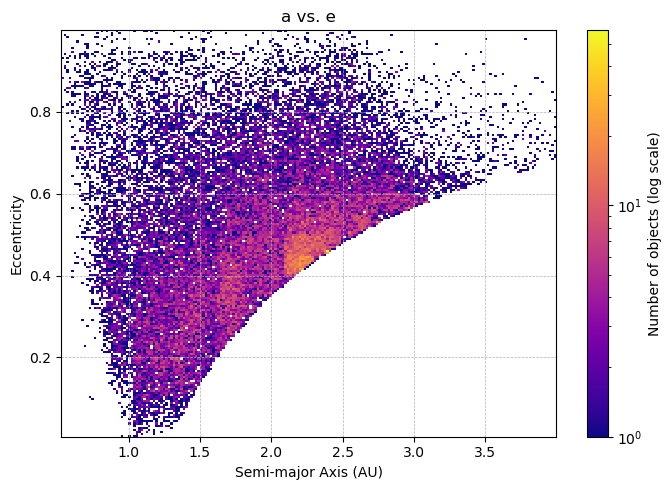

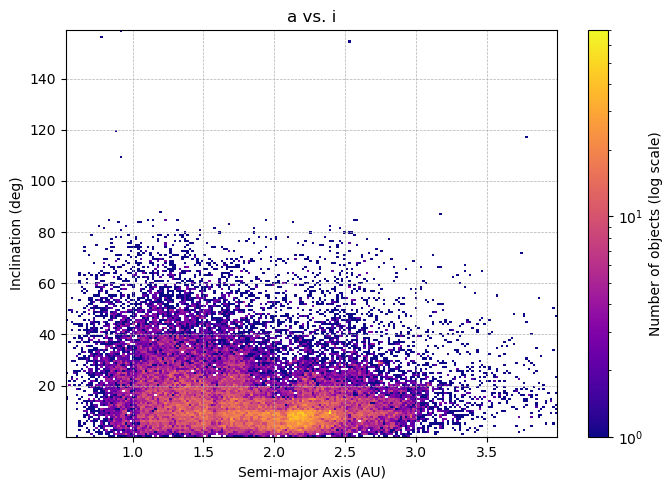

In [13]:
from matplotlib.colors import LogNorm
log_scale=True
scatterplot_cutoff=500
use_heatmap = len(df) > scatterplot_cutoff

# Plot a vs. e
if 'a' in df.columns and 'e' in df.columns:   
    plt.figure(figsize=(7, 5))
    if use_heatmap:
        norm = LogNorm() if log_scale else None
        plt.hist2d(df['a'], df['e'], bins=(200, 200), cmap='plasma', cmin=1, norm=norm)
        plt.colorbar(label='Number of objects (log scale)' if log_scale else 'Number of objects')
    else:
        plt.scatter(df['a'], df['e'], s=0.1, alpha=0.5)
    plt.xlabel('Semi-major Axis (AU)')
    plt.ylabel('Eccentricity')
    plt.title('a vs. e')
    plt.tight_layout()
    plt.grid(True, ls="--", lw=0.5)
    plt.show()

# Plot a vs. incl
if 'a' in df.columns and 'incl' in df.columns:
    plt.figure(figsize=(7, 5))
    if use_heatmap:
        norm = LogNorm() if log_scale else None
        plt.hist2d(df['a'], df['incl'], bins=(200, 200), cmap='plasma', cmin=1, norm=norm)
        plt.colorbar(label='Number of objects (log scale)' if log_scale else 'Number of objects')
    else:
        plt.scatter(df['a'], df['incl'], s=0.1, alpha=0.5)
    plt.xlabel('Semi-major Axis (AU)')
    plt.ylabel('Inclination (deg)')
    plt.title('a vs. i')
    plt.tight_layout()
    plt.grid(True, ls="--", lw=0.5)
    plt.show()

In [2]:
if 'discoverySubmissionDate' in df.columns and 'numObs' in df.columns:
    df['discoverySubmissionDate'] = pd.to_datetime(df['discoverySubmissionDate'], errors='coerce')
    discovery_cutoff = pd.Timestamp("2023-08-01")
    df['is_new'] = df['discoverySubmissionDate'] >= discovery_cutoff

    plt.style.use("seaborn-v0_8-colorblind")
    color_map = {True: "C1", False: "C0"}

    # Plot a vs. e
    if 'a' in df.columns and 'e' in df.columns and 'incl' in df.columns:
        # Plot a vs. e
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        for is_new, group in df.groupby("is_new"):
            axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.6, s=15, c=color_map[is_new])
        axs[0].set_xlabel("Semi-Major Axis (a) [AU]")
        axs[0].set_ylabel("Eccentricity (e)")
        axs[0].set_title("Semi-Major Axis vs. Eccentricity")
        axs[0].legend()
        
        # Plot a vs. incl
        for is_new, group in df.groupby("is_new"):
            axs[1].scatter(group["a"], group["incl"], label="New" if is_new else "Known", alpha=0.6, s=15, c=color_map[is_new])
        axs[1].set_xlabel("Semi-Major Axis (a) [AU]")
        axs[1].set_ylabel("Inclination (i) [deg]")
        axs[1].set_title("Semi-Major Axis vs. Inclination")
        axs[1].legend()

        plt.suptitle("New vs. Known Objects")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
         

    # Number of Observations Histogram
    fig, ax = plt.subplots(figsize=(8, 6))
    for is_new, group in df.groupby("is_new"):
        ax.hist(group["numObs"], bins=30, alpha=0.7, label="New" if is_new else "Known", color=color_map[is_new])
    ax.set_xlabel("Number of Observations")
    ax.set_ylabel("Count")
    ax.set_title("Observation Count Distribution")
    ax.legend()
    plt.tight_layout()
    plt.show()

NameError: name 'df' is not defined

#### Testing on simulated data to check things are running as expected.

In [24]:
import pandas as pd
import numpy as np

n_known=500
n_new=300
np.random.seed(42)

# Generate known objects (before 2020)
known = pd.DataFrame({'a': np.random.uniform(1.0, 3.5, n_known), 'e': np.random.uniform(0.0, 0.9, n_known),
    'incl': np.random.uniform(0.0, 30.0, n_known), 'discoverySubmissionDate': pd.to_datetime(
        np.random.choice(pd.date_range("1990-01-01", "2019-12-31"), n_known)), 
    'numObs': np.random.poisson(30, n_known)})

# Generate new objects (after 2020)
new = pd.DataFrame({'a': np.random.uniform(1.2, 2.8, n_new), 'e': np.random.uniform(0.1, 0.8, n_new),
    'incl': np.random.uniform(0.0, 25.0, n_new), 'discoverySubmissionDate': pd.to_datetime(
        np.random.choice(pd.date_range("2021-01-01", "2025-06-01"), n_new)),
    'numObs': np.random.poisson(10, n_new)})

test_df = pd.concat([known, new], ignore_index=True)

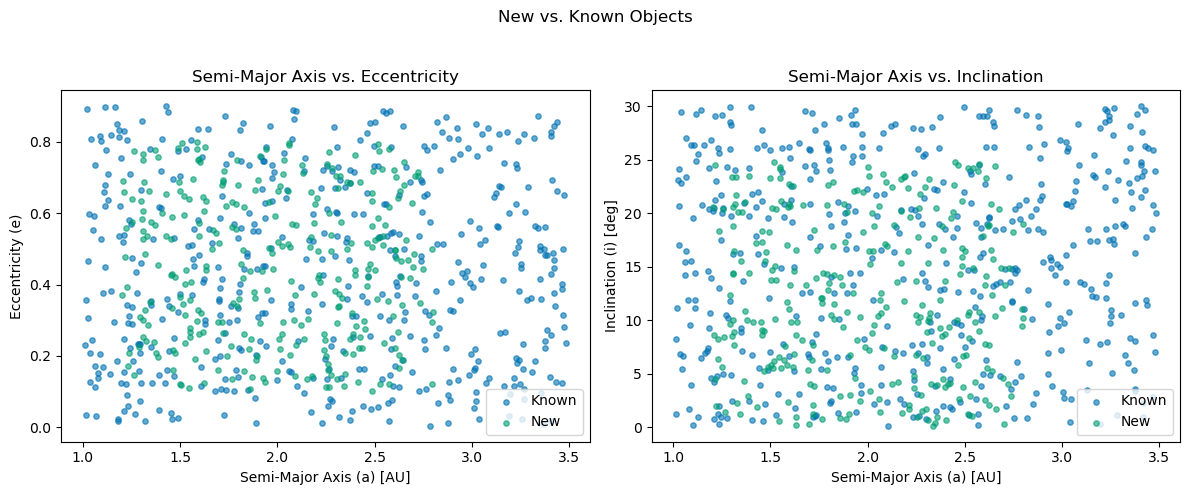

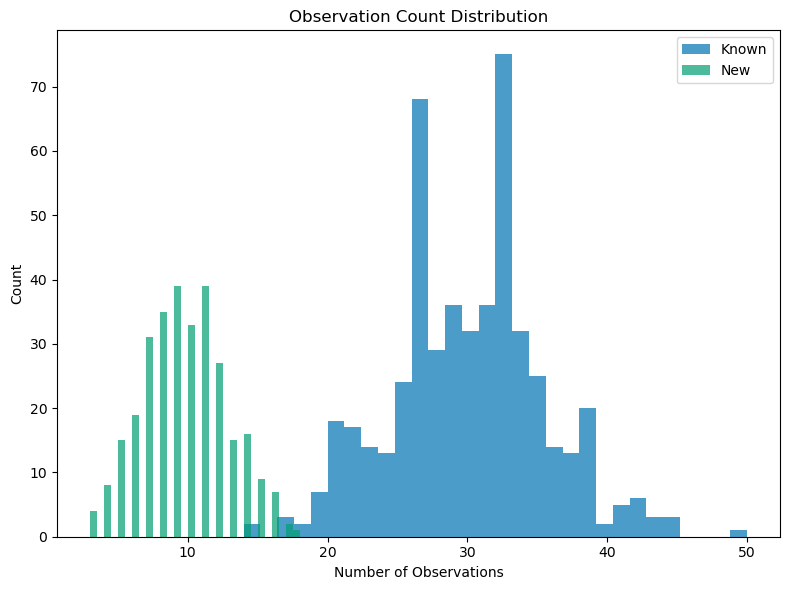

In [25]:
if 'discoverySubmissionDate' in test_df.columns and 'numObs' in test_df.columns:
    test_df['discoverySubmissionDate'] = pd.to_datetime(test_df['discoverySubmissionDate'], errors='coerce')
    discovery_cutoff = pd.Timestamp("2020-01-01")
    test_df['is_new'] = test_df['discoverySubmissionDate'] >= discovery_cutoff

    plt.style.use("seaborn-v0_8-colorblind")
    color_map = {True: "C1", False: "C0"}

    # Plot a vs. e
    if 'a' in test_df.columns and 'e' in test_df.columns and 'incl' in test_df.columns:
        # Plot a vs. e
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        for is_new, group in test_df.groupby("is_new"):
            axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.6, s=15, c=color_map[is_new])
        axs[0].set_xlabel("Semi-Major Axis (a) [AU]")
        axs[0].set_ylabel("Eccentricity (e)")
        axs[0].set_title("Semi-Major Axis vs. Eccentricity")
        axs[0].legend()
        
        # Plot a vs. incl
        for is_new, group in test_df.groupby("is_new"):
            axs[1].scatter(group["a"], group["incl"], label="New" if is_new else "Known", alpha=0.6, s=15, c=color_map[is_new])
        axs[1].set_xlabel("Semi-Major Axis (a) [AU]")
        axs[1].set_ylabel("Inclination (i) [deg]")
        axs[1].set_title("Semi-Major Axis vs. Inclination")
        axs[1].legend()

        plt.suptitle("New vs. Known Objects")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
         

    # Number of Observations Histogram
    fig, ax = plt.subplots(figsize=(8, 6))
    for is_new, group in test_df.groupby("is_new"):
        ax.hist(group["numObs"], bins=30, alpha=0.7, label="New" if is_new else "Known", color=color_map[is_new])
    ax.set_xlabel("Number of Observations")
    ax.set_ylabel("Count")
    ax.set_title("Observation Count Distribution")
    ax.legend()
    plt.tight_layout()
    plt.show()